In [45]:
import pandas as pd
import requests

In [46]:
headers = {
        'Content-Type': 'application/json'
        }
requeestRespons = requests.get("https://api.tiingo.com/tiingo/daily/TSLA/prices?startDate=2012-1-1&endDate=2016-1-1?token=635bdbd888f766a407a43a68f241602aa5b218b9",
                                    headers=headers)

In [47]:
df = pd.DataFrame(data=requeestRespons)
df.head()

,0
0,"b'{""detail"":""Please supply a token""}'"


In [50]:
from tiingo import TiingoClient
config = {}

# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "635bdbd888f766a407a43a68f241602aa5b218b9"

# Initialize
client = TiingoClient(config)


In [66]:
historical_prices = client.get_ticker_price("GOOGL",
                                            fmt='json',
                                            startDate='2017-08-01',
                                            endDate='2017-08-31',
                                            frequency='1Min')

In [67]:
df = pd.DataFrame(historical_prices)

df.head()

,date,close,high,low,open
0,2017-08-01T13:30:00.000Z,950.67,950.67,950.22,950.60
1,2017-08-01T13:31:00.000Z,950.67,950.67,950.67,950.67
2,2017-08-01T13:32:00.000Z,949.47,952.69,949.47,952.69
3,2017-08-01T13:33:00.000Z,949.47,949.47,949.47,949.47
4,2017-08-01T13:34:00.000Z,949.47,949.47,949.47,949.47


In [69]:
print(client.list_stock_tickers()[0:10])

[{'ticker': '000001', 'exchange': 'SHE', 'assetType': 'Stock', 'priceCurrency': 'CNY', 'startDate': '2007-01-04', 'endDate': '2022-12-09'}, {'ticker': '000002', 'exchange': 'SHE', 'assetType': 'Stock', 'priceCurrency': 'CNY', 'startDate': '2007-01-04', 'endDate': '2022-12-09'}, {'ticker': '000003', 'exchange': 'SHE', 'assetType': 'Stock', 'priceCurrency': 'CNY', 'startDate': '', 'endDate': ''}, {'ticker': '000004', 'exchange': 'SHE', 'assetType': 'Stock', 'priceCurrency': 'CNY', 'startDate': '2007-08-31', 'endDate': '2022-12-09'}, {'ticker': '000005', 'exchange': 'SHE', 'assetType': 'Stock', 'priceCurrency': 'CNY', 'startDate': '2007-08-31', 'endDate': '2022-12-09'}, {'ticker': '000006', 'exchange': 'SHE', 'assetType': 'Stock', 'priceCurrency': 'CNY', 'startDate': '2007-01-04', 'endDate': '2022-12-09'}, {'ticker': '000007', 'exchange': 'SHE', 'assetType': 'Stock', 'priceCurrency': 'CNY', 'startDate': '2007-08-31', 'endDate': '2022-12-09'}, {'ticker': '000008', 'exchange': 'SHE', 'asset

In [1]:
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
from tiingo import TiingoClient

In [2]:
config = {}
config['session'] = True
config['api_key'] = "635bdbd888f766a407a43a68f241602aa5b218b9"

client = TiingoClient(config)

In [13]:
data = client.get_ticker_price("AAPL",
                                    fmt='json',
                                    startDate='2010-01-01',
                                    endDate='2022-6-1',
                                    frequency='1hour')
df = pd.DataFrame(data)
df = df.set_index('date').sort_index()


In [14]:
df.head()

,close,high,low,open
date,,,,
2016-12-12T15:00:00.000Z,113.090,113.090,112.525,112.995
2016-12-12T16:00:00.000Z,112.990,113.130,112.870,113.120
2016-12-12T17:00:00.000Z,113.005,113.035,112.705,112.995
2016-12-12T18:00:00.000Z,112.835,115.000,112.740,113.000
2016-12-12T19:00:00.000Z,112.960,113.110,112.755,112.830


<AxesSubplot:xlabel='date'>

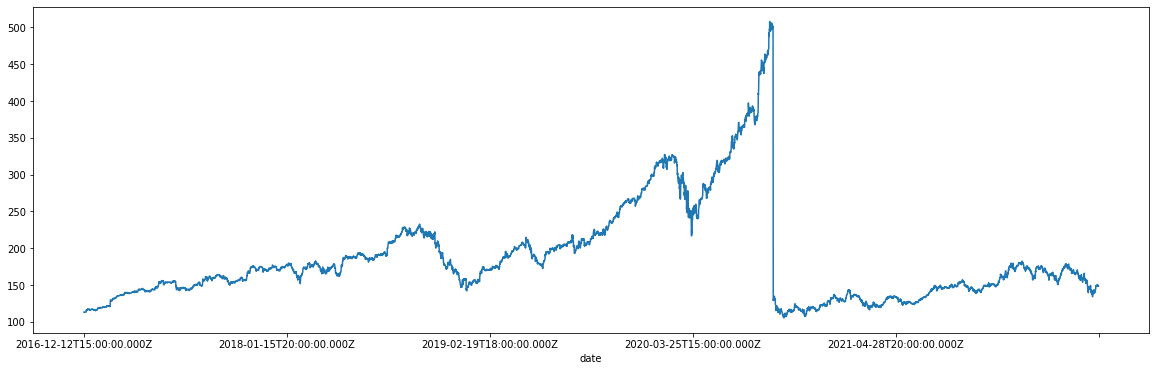

In [15]:
df["close"].plot(figsize=(20,6))

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [12]:

symbol = "TSLA"
requeestRespons = requests.get(f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol={symbol}&interval=15min&slice=year1month1&apikey=R9PZNQ5V0SURGXPO")

In [13]:
data_dict = json.loads(requeestRespons)
df = pd.DataFrame(data_dict["Time Series ()"])

TypeError: the JSON object must be str, bytes or bytearray, not Response